In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
x=np.linspace(-1,1,1001)
d=np.exp(x)

In [42]:
#classic case

def fit_poly(x,d,order,N=None):
    A=np.vander(x,N=order,increasing=False)
    if(N):
        L=np.linalg.cholesky(np.linalg.inv(N)) # could also decompose N and then take inv of L. same thing for now.
        d=L.T@d
        A=L.T@A
    lhs = A.T@A
    rhs= A.T@d
    m = np.linalg.inv(lhs)@rhs
    return m

In [7]:
# QR case

def fit_qr(x,d,order,N=None):
    A=np.vander(x,N=order,increasing=False)
    if(N):
        L=np.linalg.cholesky(np.linalg.inv(N))
        d=L.T@d
        A=L.T@A
    q, r = np.linalg.qr(A)
    m = np.linalg.inv(r)@q.T@d
    return m

In [34]:
m1=fit_poly(x,d,30)

In [35]:
pred=np.polyval(m1,x)

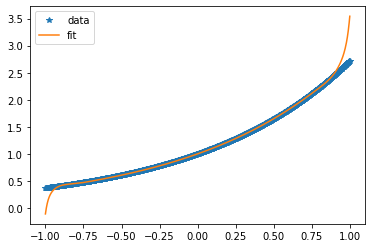

In [37]:
plt.plot(x,d,'*',label='data')
plt.plot(x,pred,label='fit')
plt.legend()

In [39]:
m2=fit_qr(x,d,30)

In [40]:
pred=np.polyval(m2,x)

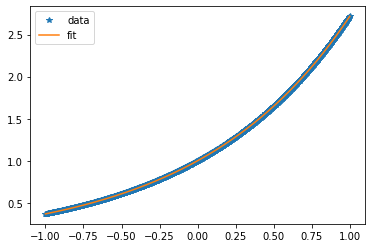

In [41]:
plt.plot(x,d,'*',label='data')
plt.plot(x,pred,label='fit')
plt.legend()

much better with qr